<a href="https://colab.research.google.com/github/isamoreo/ProcesamientoDigitalDeImagenes/blob/master/Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# importar librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path= '/content/drive/My Drive/SEMESTRE 7/DIGITAL IMAGE PROCESSING'
os.chdir(path)
!pwd

## graficar imagenes estáticas en el notebook
%matplotlib inline

/content/drive/My Drive/SEMESTRE 7/DIGITAL IMAGE PROCESSING


In [0]:
def displayGray3(a, b, c, title1="Original", title2="Edited", title3="Edited"):
    plt.figure(figsize=(3,3))
    
    plt.subplot(131), plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(132), plt.imshow(b,  cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(133), plt.imshow(c,  cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    
    plt.show()
    
def displayGray2(a, b, title1="Original", title2="Edited"):
    plt.figure(figsize=(10,10))
    
    plt.subplot(121), plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122), plt.imshow(b,  cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    
    plt.show()
    
def displayColor3(a, b, c, title1="Original", title2="Edited", title3="Edited"):
    plt.figure(figsize=(10,10))
    
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    
    plt.show()
    
def displayColor2(a, b, title1="Original", title2="Edited"):
    plt.figure(figsize=(10,10))
    
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    
    plt.show()
    
def readRGB(imgPath):
    img = cv2.imread(imgPath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# **Interpolación Nearest Neighbor**

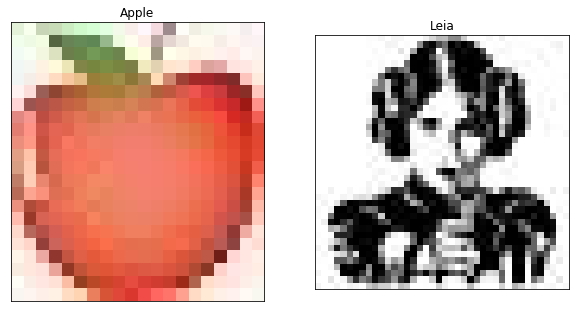

In [4]:
imgA = readRGB('apple20x22.jpg')
imgM= readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx = 5, fy = 5, interpolation = cv2.INTER_NEAREST)
near_imgM = cv2.resize(imgM, None, fx = 5, fy = 5, interpolation = cv2.INTER_NEAREST)
displayColor2(near_imgA, near_imgM, 'Apple', 'Leia')

# Interpolación **Bilinear**

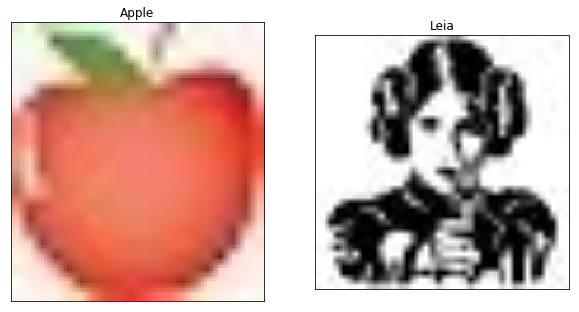

In [5]:
imgA = readRGB('apple20x22.jpg')
imgM= readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx = 5, fy = 5, interpolation = cv2.INTER_LINEAR)
near_imgM = cv2.resize(imgM, None, fx = 5, fy = 5, interpolation = cv2.INTER_LINEAR)
displayColor2(near_imgA, near_imgM, 'Apple', 'Leia')

# Interpolación Bicú**bica**

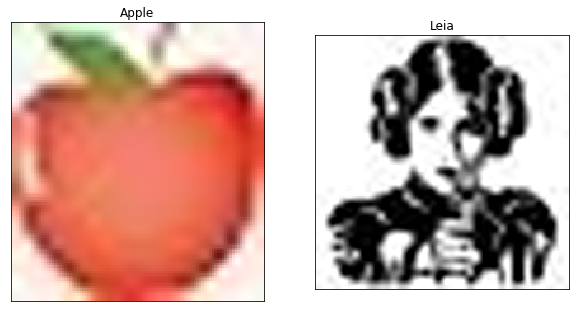

In [6]:
imgA = readRGB('apple20x22.jpg')
imgM= readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx = 5, fy = 5, interpolation = cv2.INTER_CUBIC)
near_imgM = cv2.resize(imgM, None, fx = 5, fy = 5, interpolation = cv2.INTER_CUBIC)
displayColor2(near_imgA, near_imgM, 'Apple', 'Leia')

# Otras formas de interpolación - **OpenCV**

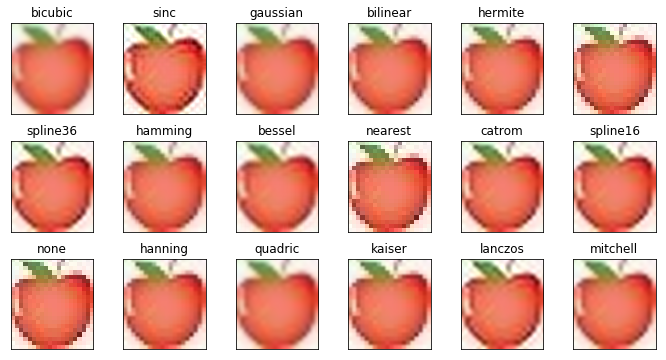

In [7]:
methods = {None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite',
          'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel','mitchell', 'sinc', 'lanczos'}

#grid = np.random.rand(4, 4)
#grid = imgA

fig, axes = plt.subplots(3, 6, figsize = (12, 6), subplot_kw = {'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace = 0.3, wspace = 0.05)

#ax funciona como el subplot - se le va añadiendo el método mientras se crea el subplot

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(imgA, interpolation = interp_method)
    ax.set_title(interp_method)
    
plt.show()

# Negativo de una Imagen a Color - con libreria PIL de **python**

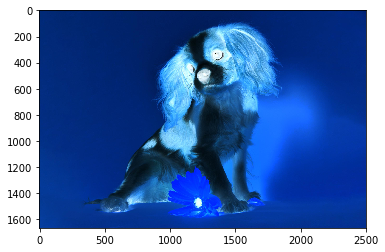

In [8]:
#cargar paquete Image de la libreria PIL
from PIL import Image

#objeto "foto"
foto = Image.open('dogDIP.jpg')

#generar una lista de la imagen para crear un vector
datos = list(foto.getdata())

#aquí se invierte la imagen con un for en una única línea (itera desde 0 hasta el tamaño de los datos)- recorre la imagen, devuelve pixeles y matrices con datos invertidos
datos_invertidos = [(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2]) for x in range(len(datos))]

#vuelve a generar la imagen a partir de la lista
imagen_invertida = Image.new('RGB', foto.size)

#Guardar los datos para mostrarlos
imagen_invertida.putdata(datos_invertidos)

#imagen_invertida.save('dogDIP.jpg')

#np.asarray porque el lee un arreglo, no una imagen
plt.imshow(np.asarray(imagen_invertida))

# Negativo de una imagen a B&W - con libreria PIL de **python**

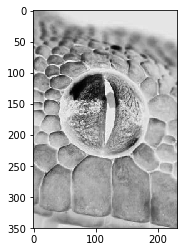

In [9]:
#cargar paquete Image de la libreria PIL
from PIL import Image

#objeto "foto"
foto = Image.open('ojo.jpg')

#generar una lista de la imagen para crear un vector
datos = foto.getdata()

#aquí se invierte la imagen con un for en una única línea (itera desde 0 hasta el tamaño de los datos)- recorre la imagen, devuelve pixeles y matrices con datos invertidos
datos_invertidos = [255 - x for x in datos]

#vuelve a generar la imagen a partir de la lista
imagen_invertida = Image.new('L', foto.size)

#Guardar los datos para mostrarlos
imagen_invertida.putdata(datos_invertidos)

#imagen_invertida.save('dogDIP.jpg')

#np.asarray porque el lee un arreglo, no una imagen
plt.imshow(np.asarray(imagen_invertida),cmap='gray')

# **Negativo de imagen a B&W - OpenCv**

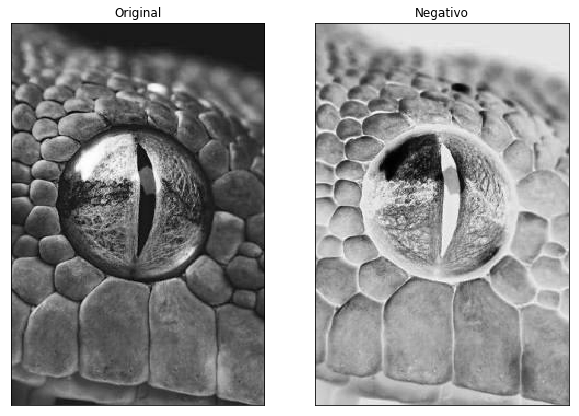

In [10]:
def negative(l):
    #cargar imagen
    img = cv2.imread("ojo.jpg", cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2 = np.zeros((rows, columns), dtype = np.uint8)
    for x in range(rows):
        for y in range(columns):
            img2[x, y] = (l-1)-img[x, y]
        
    displayGray2(img,img2, 'Original', 'Negativo')
    return
  
negative(256)
        

# Transformación Logarí**tmica - OpenCV** 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


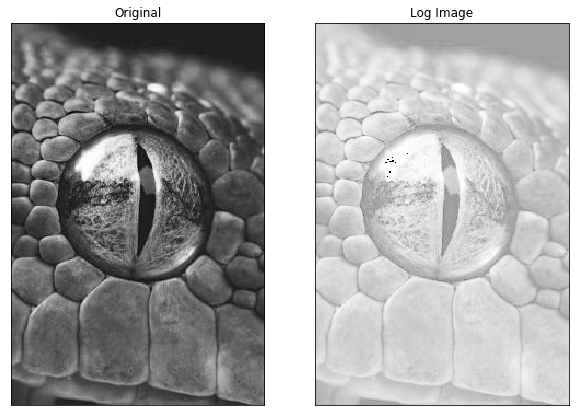

In [11]:
import cv2
import numpy as np

#lod the image
img = cv2.imread('ojo.jpg')

#Apply log transform
img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255

#Specify the data type
img_log = np.array(img_log, dtype=np.uint8)

#Display the image 
displayGray2(img, img_log, 'Original', 'Log Image')

# **Transformación Ley de Potencia (Gamma)**

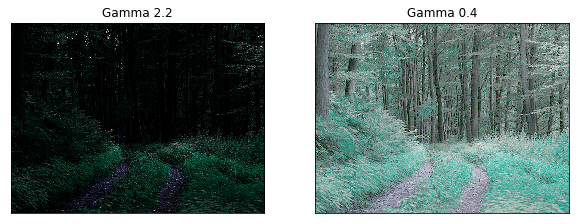

In [59]:
import numpy as np
import cv2

#load the image
img = cv2.imread('tree.png')

#Apply Gammma = 2.2 on the normalized image and then multiply by scaling cosnt
gamma_two_point_two = np.array(255*(img/255)**2.2, dtype='uint8')

# Simirarly, apply Gamma = 0.4
gamma_point_four = np.array(255*(img/255)**0.4, dtype = 'uint8')

#Display the images in subplots
displayGray2(gamma_two_point_two, gamma_point_four, 'Gamma 2.2', 'Gamma 0.4' )

# **Binarización - Gray Level Slicing
**

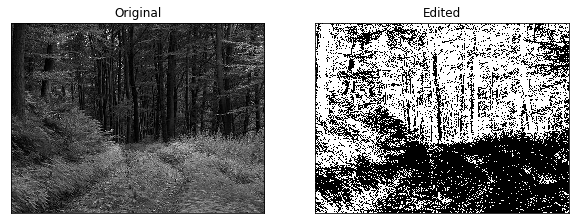

In [36]:
#El rango predeterminado es 10-60, se podría omitir ponerlos como entradas

def binarizacion(img, minr=10, maxr=60):
    img = cv2.imread(img, 0)
    
    #Find width and height of image
    row, column = img.shape
    
    #Create a zeros array to store te sliced image
    img1 = np.zeros((row, column), dtype = 'uint8')
    
    # Specify the min and max range
    min_range = minr
    max_range = maxr
    
    # Loop over the input image and if pixel value lies in desired range, 
    for i in range(row):
        for j in range(column):
            
            if img[i,j]>min_range and img[i,j]<max_range:
                img1[i,j] = 255
            else:
                img1[i,j] = 0
                
    # Display the image 
    displayGray2(img, img1)
    return

binarizacion('tree.png',10,60)

# **Binarización - Fraccionamiento**

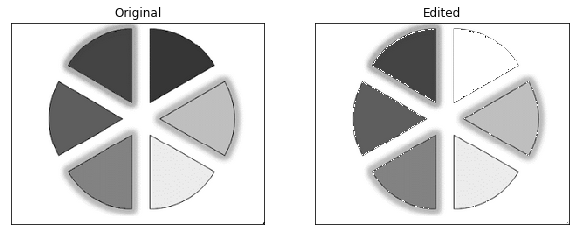

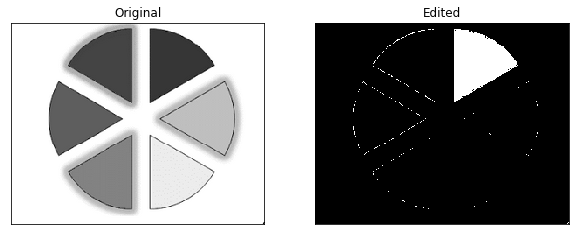

In [56]:
def fraccionamiento(img, minr=10, maxr=60):
    
    #Cargar imagen
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2 = np.zeros((rows, columns), dtype = np.uint8)
    
    #Intervalos
    a = minr
    b = maxr
    
    for x in range(0, rows):
        for y in range(0, columns):
            
            r = img[x][y]
            
            if a<=r and r<=b:
                img2[x][y] = 255
            else:
                img2[x][y] = img[x][y]
                
    displayGray2(img, img2)
    return

fraccionamiento('pastel.png', 10, 60)
# y para comparar:
binarizacion('pastel.png', 10, 60)

# Binarización - Threshold (límite)

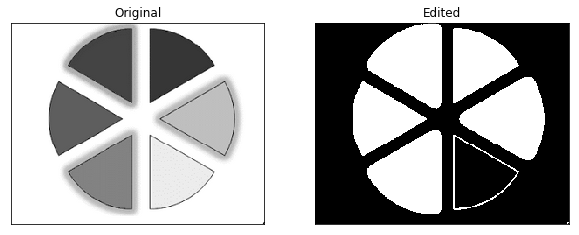

In [57]:
# No se utiliza un rango, ahora es un solo límite

def Threshold(img, thres):
    # Cargar imagen
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2 = np.zeros((rows,columns), dtype = np.uint8)
    
    # Límite
    T = thres
    
    #Revisa si está por encima del valor, da cero (negro) a todas las intensidades. De la otra forma se vuelven todos blancos 255
    for x in range(0, rows):
        for y in range(0, columns):
            
              r = img[x][y]
              if T<= r:
                  img2[x][y] = 0
              else:
                  img2[x][y] = 255
                  
    displayGray2(img, img2)
    return
  
Threshold('pastel.png', 220)

# **Binarización - Bit Plane Slicing**

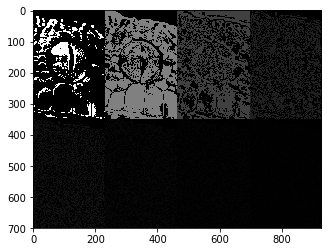

In [61]:
img = cv2.imread('ojo.jpg', 0)

#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        lst.append(np.binary_repr(img[i][j], width = 8)) # width = number of bits
        
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need
# Multiply with 2^(n-1) and reshape to reconstruct the bit image

eight_bit_img = (np.array([int(i[0]) for i in lst], dtype = np.uint8) * 128).reshape(img.shape[0], img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst], dtype = np.uint8) * 64).reshape(img.shape[0], img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst], dtype = np.uint8) * 32).reshape(img.shape[0], img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst], dtype = np.uint8) * 16).reshape(img.shape[0], img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst], dtype = np.uint8) * 8).reshape(img.shape[0], img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst], dtype = np.uint8) * 4).reshape(img.shape[0], img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst], dtype = np.uint8) * 2).reshape(img.shape[0], img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst], dtype = np.uint8) * 1).reshape(img.shape[0], img.shape[1])

# Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img, seven_bit_img, six_bit_img, five_bit_img])
finalv = cv2.hconcat([four_bit_img, three_bit_img, two_bit_img, one_bit_img])

# Vertically concatenate
final = cv2.vconcat([finalr, finalv])
plt.imshow(final, cmap = 'gray')